In [216]:
# Import libraries and dataset

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [218]:
df = pd.read_csv('student-mat.csv',sep=';')

In [219]:
# Overview of data

In [220]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [221]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [222]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [223]:
# Retain desired features for modelling
# Convert categorical data to numerical data

In [224]:
df=df[['G1','G2','G3','absences','health','romantic','internet','activities', 'paid', 'failures', 'studytime', 'traveltime', 'school', 'age', 'sex']]

In [225]:
df.head()

,G1,G2,G3,absences,health,romantic,internet,activities,paid,failures,studytime,traveltime,school,age,sex
0,5,6,6,6,3,no,no,no,no,0,2,2,GP,18,F
1,5,5,6,4,3,no,yes,no,no,0,2,1,GP,17,F
2,7,8,10,10,3,no,yes,no,yes,3,2,1,GP,15,F
3,15,14,15,2,5,yes,yes,yes,yes,0,3,1,GP,15,F
4,6,10,10,4,5,no,no,no,yes,0,2,1,GP,16,F


In [226]:
df1=pd.get_dummies(df[['romantic','internet','activities','paid','school','sex']], drop_first=True)

In [227]:
df1.head()

,romantic_yes,internet_yes,activities_yes,paid_yes,school_MS,sex_M
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,1,0,0
3,1,1,1,1,0,0
4,0,0,0,1,0,0


In [228]:
df.drop(['romantic','internet','activities','paid','school','sex'],axis=1, inplace=True)

In [229]:
df=pd.concat([df,df1],axis=1)
df.head()

,G1,G2,G3,absences,health,failures,studytime,traveltime,age,romantic_yes,internet_yes,activities_yes,paid_yes,school_MS,sex_M
0,5,6,6,6,3,0,2,2,18,0,0,0,0,0,0
1,5,5,6,4,3,0,2,1,17,0,1,0,0,0,0
2,7,8,10,10,3,3,2,1,15,0,1,0,1,0,0
3,15,14,15,2,5,0,3,1,15,1,1,1,1,0,0
4,6,10,10,4,5,0,2,1,16,0,0,0,1,0,0


In [230]:
# Check distribution of G3 results

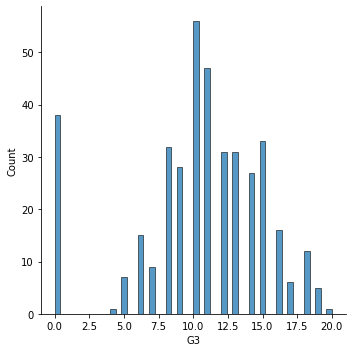

In [231]:
sns.displot(data=df, x='G3', bins=50)

In [232]:
# Split data into X and y arrays

In [233]:
df.columns

Index(['G1', 'G2', 'G3', 'absences', 'health', 'failures', 'studytime',
       'traveltime', 'age', 'romantic_yes', 'internet_yes', 'activities_yes',
       'paid_yes', 'school_MS', 'sex_M'],
      dtype='object')

In [234]:
X=df[['G1', 'G2', 'absences', 'health', 'failures', 'studytime',
       'traveltime', 'age', 'romantic_yes', 'internet_yes', 'activities_yes',
       'paid_yes', 'school_MS', 'sex_M']]
y=df['G3']

In [235]:
# Create train and test splits

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [237]:
# Create and train model

In [238]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [239]:
# Print coefficients and intercept of model

In [240]:
print(lm.intercept_)

1.743586975149265


In [241]:
print(lm.coef_)

[ 0.15029952  0.97185739  0.04545074  0.08646616 -0.19344717 -0.16351098
  0.09067903 -0.19994723 -0.38363135 -0.45208264 -0.25147075  0.27859213
  0.42897971  0.16225069]


In [242]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
G1,0.150300
G2,0.971857
absences,0.045451
health,0.086466
failures,-0.193447
studytime,-0.163511
traveltime,0.090679
age,-0.199947
romantic_yes,-0.383631
internet_yes,-0.452083


In [243]:
# Apply model on test data and visualise results

In [244]:
predictions = lm.predict(X_test)

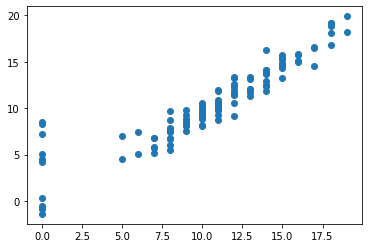

In [245]:
plt.scatter(y_test,predictions)

In [246]:
# Check residuals

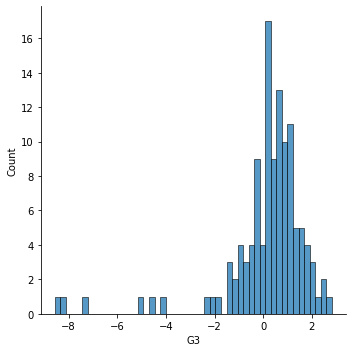

In [247]:
sns.displot((y_test-predictions),bins=50)

In [248]:
# Print evaluation metrics

In [249]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R Square Value:', metrics.explained_variance_score(y_test,predictions))

Mean Absolute Error: 1.1461532188242531
Mean Squared Error: 3.2580569932889043
Root Mean Squared Error: 1.805008862385142
R Square Value: 0.8490182712648928
